In [58]:
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import matplotlib.patches as patches
import pandas as pd
import numpy as np

%matplotlib inline

In [71]:
class_data = pd.read_csv('class-descriptions-boxable.csv', header=None)
class_dict = {class_data.iloc[i][0]:class_data.iloc[i][1] for i in range(len(class_data))}  # a dict mapping MID to class name

In [47]:
filename = 'train-annotations-bbox.csv'
annotations = []
with open(filename, "r") as csvfile:
    datareader = csv.reader(csvfile)
    count = 0
    for row in datareader:
        annotations.append(row)
        count += 1
        if count > 14:
            break

In [49]:
header = annotations[0]
annotations = np.asarray(annotations[1:])
annotations.shape

(14, 13)

In [78]:
# all classes present in the picture
for c in annotations[:, 2]:
    print(class_dict[c])

Person
Person
Person
Person
Person
Person
Person
Dairy
Table
Table
Table
Cake
Pastry
Building


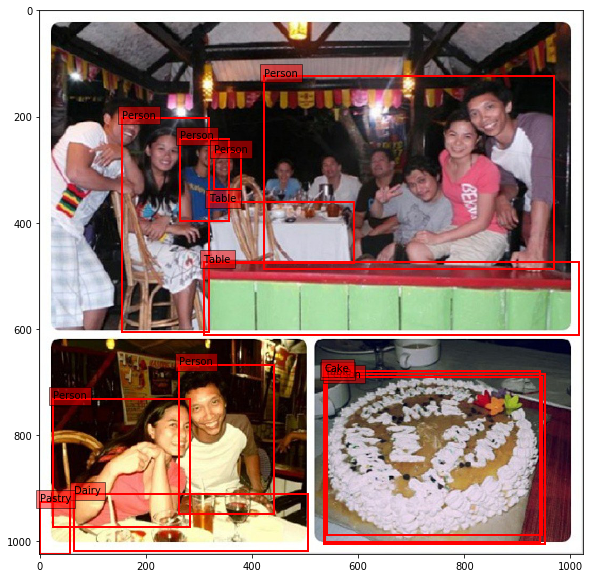

In [79]:
bboxes = annotations[1:, 4:8].astype('float32')
image = imread('000002b66c9c498e.jpg')
scale = image.shape[0]
fig,ax = plt.subplots(figsize=(10, 10))
for idx, box in enumerate(bboxes):
    XMin, XMax, YMin, YMax = box * scale
    w = XMax - XMin + 1
    h = YMax - YMin + 1
    rect = plt.Rectangle((XMin, YMin), width=w, height=h, edgecolor='r', fill=None, linewidth=2)
    ax.add_patch(rect)
    label = class_dict[annotations[idx][2]]
    ax.text(XMin, YMin, label, bbox={'facecolor':'r', 'alpha':0.5})
ax.imshow(image)
plt.show()